# **Breast Cancer Classificastion by Helal Assaf , Ibrahim Tahyaneh ,and  Momen Salameh** 

Our data set is collected for breast cancer paitents, we download it from the link below, please find it to download the data: 
https://www.kaggle.com/uciml/breast-cancer-wisconsin-data 

In this project, we are going to build binary classicfication model which decide if the person have a breast cancer or not , based on collected features that doctors normally ask for.

We are going to test the dataset using 3 main algorithms used for binary classification (logistic regression , KNN , VSM ) in Machine learning ,and choose the best one that gives the best perfgormance by reducing the loss function. 

 Here we will mention the steps that we have covered during our work over dataset:
 1. Acquire the dataset which is stored in our local drive , dataset called HIM 
(that indicated the first letter of our names :) )
 2. Import all the crucial libraries
 3. upload and Import the dataset
 4. Identifying and handling the missing values , nulls ... 
 5. Encoding the categorical data
 6. Feature scaling and selection  
 7. Splitting the dataset into training and testing sets 
 8. apply three alogorithms in our datset 
 9. Models evaluation snd choose the best performance one using the evaulation metrics 


**1) Load Libraries:**

Firstly , here we are going to load all the libraries that may help in the coding ,we are adding them step by step when we need it in the next stages . please find the listed used libraries below: 

In [0]:
# Imported Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import sklearn libraries 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.decomposition import PCA as sklearnPCA
from google.colab import files
import io
import warnings
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from feature_selector import FeatureSelector
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt


In [299]:
pip install feature_selector



**2) Upload and Import the dataset**

here , we add this code in order to search and load the dataset from our local drive. 
our data sets is called HIM.csv refers to Helal Assaf , Ibrahim tahayneh ,and Momen Salameh.

So, lets upload the HIM data set to our code usign the upload function:

In [300]:
uploaded = files.upload()

Saving HIM.csv to HIM (7).csv


---------------------------------------------------------------------------
 now , We load and read the file in data frame called bst_cancer: 
bst_cancer  is the raw data set of our project.

In [0]:
bst_cancer = pd.read_csv(io.BytesIO(uploaded['HIM.csv']))

---------------------------------------------------------------------------
Fist of all  we will show the head of data set in order to see some of our data set . 


In [302]:
bst_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,NaN,158.80,1956.0,0.1238,0.1866,0.2416,NaN,0.2750,0.08902
2,84300903,NaN,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,NaN,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,NaN,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [303]:
bst_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  555 non-null object
radius_mean                569 non-null float64
texture_mean               567 non-null float64
perimeter_mean             569 non-null float64
area_mean                  567 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              566 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 567 non-null float64
perimeter_se               567 non-null float64
area_se                    565 non-null float64
smoothness_se              565 non-null float64
compactness_se             568 non-null float64
concavity_se               563 non

Now , we will discover and asset our data by show the sammary of our data set and exolore more info about it , number of rows( entries) and coloumns( features).  data set have 32 coulums with 569 rows . 
This data set have 32 features for 569 breast cancer patients . ( the first is id for the paitents ,
 the second is the catogrical response and the rest is the independent faetures:
 

In [304]:
bst_cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,1.0950,0.9053,8.5890,153.400,0.006399,0.049040,0.053730,0.015870,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,0.5435,0.7339,3.3980,74.080,0.005225,0.013080,0.018600,0.013400,0.01389,0.003532,24.990,NaN,158.80,1956.0,0.12380,0.18660,0.24160,NaN,0.2750,0.08902
2,84300903,NaN,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,0.7456,0.7869,4.5850,94.030,0.006150,0.040060,0.038320,0.020580,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,NaN,0.24300,0.3613,0.08758
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,0.4956,1.1560,3.4450,27.230,0.009110,0.074580,0.056610,0.018670,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,NaN,0.25750,0.6638,0.17300
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,0.7572,0.7813,5.4380,94.440,0.011490,0.024610,0.056880,0.018850,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,0.3345,0.8902,2.2170,27.190,0.007510,0.033450,0.036720,0.011370,0.02165,0.005082,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,0.4467,0.7732,3.1800,53.910,0.004314,0.013820,0.022540,0.010390,0.01369,0.002179,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,84458202,NaN,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,0.5835,1.3770,3.8560,50.960,0.008805,0.030290,0.024880,0.014480,0.01486,0.005412,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,0.3063,1.0020,2.4060,24.320,0.005731,0.035020,0.035530,0.012260,0.02143,0.003749,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,0.2976,1.5990,2.0390,23.940,NaN,0.072170,0.077430,0.014320,0.01789,0.010080,15.090,40.68,97.65,711.4,NaN,1.05800,1.10500,0.22100,0.4366,0.20750


This is to  get more statistical information about our data   :

In [305]:
bst_cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,567.000000,569.000000,567.000000,569.000000,569.000000,569.000000,569.000000,566.000000,569.000000,569.000000,567.000000,567.000000,565.000000,565.000000,568.000000,563.000000,565.000000,562.000000,567.000000,565.000000,564.000000,568.000000,567.000000,566.000000,568.000000,566.000000,565.000000,566.000000,565.000000
mean,3.037183e+07,14.127292,19.266914,91.969033,654.271429,0.096360,0.104341,0.088799,0.048919,0.181136,0.062798,0.405172,1.214946,2.867924,40.364067,0.007034,0.025463,0.031808,0.011801,0.020568,0.003798,16.279444,25.618493,107.342835,881.831570,0.132271,0.253802,0.271080,0.114374,0.290018,0.084002
std,1.250206e+08,3.524049,4.289117,24.298981,350.262882,0.014064,0.052813,0.079720,0.038803,0.027400,0.007060,0.277313,0.551601,2.024787,45.622775,0.003004,0.017920,0.030292,0.006179,0.008293,0.002649,4.828290,6.120490,33.575658,569.971323,0.022781,0.157087,0.208306,0.065800,0.061759,0.018082
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161925,0.057700,0.232400,0.832400,1.604000,17.850000,0.005169,0.013048,0.014900,0.007638,0.015165,0.002249,13.030000,21.052500,84.147500,515.550000,0.116600,0.146900,0.114425,0.064130,0.250425,0.071470
50%,9.060240e+05,13.370000,18.830000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006369,0.020435,0.025750,0.010930,0.018740,0.003187,14.970000,25.370000,97.665000,686.600000,0.131300,0.211850,0.226200,0.099750,0.282250,0.080040
75%,8.813129e+06,15.780000,21.750000,104.100000,782.650000,0.105300,0.130400,0.130700,0.074000,0.195550,0.066120,0.478900,1.472000,3.363000,44.960000,0.008124,0.032217,0.041615,0.014710,0.023488,0.004559,18.790000,29.472500,125.525000,1086.000000,0.146000,0.337600,0.380575,0.161300,0.317825,0.092090
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In next stage, we will chech the data entries for null values 
data cleaning and munging is an important stage in order to preapre the data to be more significant for our model.

Firslty we will check the null values in our data set .

In [306]:
bst_cancer.isnull()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


Then we will  check the sum of the null values and its locations in rows and coloumns: 

In [307]:
bst_cancer.isnull().sum()



id                          0
diagnosis                  14
radius_mean                 0
texture_mean                2
perimeter_mean              0
area_mean                   2
smoothness_mean             0
compactness_mean            0
concavity_mean              0
concave points_mean         0
symmetry_mean               3
fractal_dimension_mean      0
radius_se                   0
texture_se                  2
perimeter_se                2
area_se                     4
smoothness_se               4
compactness_se              1
concavity_se                6
concave points_se           4
symmetry_se                 7
fractal_dimension_se        2
radius_worst                4
texture_worst               5
perimeter_worst             1
area_worst                  2
smoothness_worst            3
compactness_worst           1
concavity_worst             3
concave points_worst        4
symmetry_worst              3
fractal_dimension_worst     4
dtype: int64

we will deal the null values in two scenario : 
fist, if the null value in the catogrical response ,  we will remove its entire row . 
second, if  the null in the numerical independent variables we will replace the null with the mean of its couloumn.

First scenario : delete  row that contains null value in the catogrical response ( diagnosis ):

In [0]:
df = bst_cancer.dropna(axis=0, subset=['diagnosis'])


Second scenario : replace the null values in the independent varibales by the mean of its coloumn mean.

In [0]:
df=df.fillna(df.mean())


We like to chek if the null values have been replaced or removed in our data:

In [310]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Show the data to see how it now:

In [311]:
df 


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.990,10.38,122.80,1001.000000,0.11840,0.27760,0.300100,0.147100,0.241900,0.07871,1.0950,0.905300,8.5890,153.400,0.006399,0.049040,0.053730,0.015870,0.030030,0.006193,25.380,17.330000,184.60,2019.0,0.162200,0.66560,0.711900,0.265400,0.460100,0.11890
1,842517,M,20.570,17.77,132.90,1326.000000,0.08474,0.07864,0.086900,0.070170,0.181200,0.05667,0.5435,0.733900,3.3980,74.080,0.005225,0.013080,0.018600,0.013400,0.013890,0.003532,24.990,25.546218,158.80,1956.0,0.123800,0.18660,0.241600,0.114196,0.275000,0.08902
3,84348301,M,11.420,20.38,77.58,386.100000,0.14250,0.28390,0.241400,0.105200,0.259700,0.09744,0.4956,1.156000,3.4450,27.230,0.009110,0.074580,0.056610,0.018670,0.059630,0.009208,14.910,26.500000,98.87,567.7,0.209800,0.86630,0.271641,0.257500,0.663800,0.17300
4,84358402,M,20.290,14.34,135.10,1297.000000,0.10030,0.13280,0.198000,0.104300,0.180900,0.05883,0.7572,0.781300,5.4380,94.440,0.011490,0.024610,0.056880,0.018850,0.017560,0.005115,22.540,16.670000,152.20,1575.0,0.137400,0.20500,0.400000,0.162500,0.236400,0.07678
5,843786,M,12.450,15.70,82.57,477.100000,0.12780,0.17000,0.157800,0.080890,0.208700,0.07613,0.3345,0.890200,2.2170,27.190,0.007510,0.033450,0.036720,0.011370,0.021650,0.005082,15.470,23.750000,103.40,741.6,0.179100,0.52490,0.535500,0.174100,0.398500,0.12440
6,844359,M,18.250,19.98,119.60,1040.000000,0.09463,0.10900,0.112700,0.074000,0.179400,0.05742,0.4467,0.773200,3.1800,53.910,0.004314,0.013820,0.022540,0.010390,0.013690,0.002179,22.880,27.660000,153.20,1606.0,0.144200,0.25760,0.378400,0.193200,0.306300,0.08368
8,844981,M,13.000,21.82,87.50,519.800000,0.12730,0.19320,0.185900,0.093530,0.235000,0.07389,0.3063,1.002000,2.4060,24.320,0.005731,0.035020,0.035530,0.012260,0.021430,0.003749,15.490,30.730000,106.20,739.3,0.170300,0.54010,0.539000,0.206000,0.437800,0.10720
9,84501001,M,12.460,24.04,83.97,475.900000,0.11860,0.23960,0.227300,0.085430,0.203000,0.08243,0.2976,1.599000,2.0390,23.940,0.006995,0.072170,0.077430,0.014320,0.017890,0.010080,15.090,40.680000,97.65,711.4,0.132149,1.05800,1.105000,0.221000,0.436600,0.20750
11,84610002,M,15.780,17.89,103.60,781.000000,0.09710,0.12920,0.099540,0.066060,0.184200,0.06082,0.5058,0.984900,3.5640,54.160,0.005771,0.040610,0.027910,0.012820,0.020080,0.004144,20.420,27.280000,136.50,1299.0,0.139600,0.56090,0.396500,0.181000,0.379200,0.10480
12,846226,M,19.170,24.80,132.40,1123.000000,0.09740,0.24580,0.206500,0.111800,0.239700,0.07800,0.9555,3.568000,11.0700,116.200,0.003139,0.082970,0.088900,0.040900,0.044840,0.012840,20.960,29.940000,151.70,1332.0,0.103700,0.39030,0.363900,0.176700,0.317600,0.10230


At this stage we will encode the catogrical data into bibary , we have in our response
so we change the malignan(woman have breast cancer ) benignto ( woman have not breast cancer) 0 and 1 respectivley :

In [0]:
df.replace(('M', 'B'), (1, 0), inplace=True)

In [313]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.990,10.38,122.80,1001.000000,0.11840,0.27760,0.300100,0.147100,0.241900,0.07871,1.0950,0.905300,8.5890,153.400,0.006399,0.049040,0.053730,0.015870,0.030030,0.006193,25.380,17.330000,184.60,2019.0,0.162200,0.66560,0.711900,0.265400,0.460100,0.11890
1,842517,1,20.570,17.77,132.90,1326.000000,0.08474,0.07864,0.086900,0.070170,0.181200,0.05667,0.5435,0.733900,3.3980,74.080,0.005225,0.013080,0.018600,0.013400,0.013890,0.003532,24.990,25.546218,158.80,1956.0,0.123800,0.18660,0.241600,0.114196,0.275000,0.08902
3,84348301,1,11.420,20.38,77.58,386.100000,0.14250,0.28390,0.241400,0.105200,0.259700,0.09744,0.4956,1.156000,3.4450,27.230,0.009110,0.074580,0.056610,0.018670,0.059630,0.009208,14.910,26.500000,98.87,567.7,0.209800,0.86630,0.271641,0.257500,0.663800,0.17300
4,84358402,1,20.290,14.34,135.10,1297.000000,0.10030,0.13280,0.198000,0.104300,0.180900,0.05883,0.7572,0.781300,5.4380,94.440,0.011490,0.024610,0.056880,0.018850,0.017560,0.005115,22.540,16.670000,152.20,1575.0,0.137400,0.20500,0.400000,0.162500,0.236400,0.07678
5,843786,1,12.450,15.70,82.57,477.100000,0.12780,0.17000,0.157800,0.080890,0.208700,0.07613,0.3345,0.890200,2.2170,27.190,0.007510,0.033450,0.036720,0.011370,0.021650,0.005082,15.470,23.750000,103.40,741.6,0.179100,0.52490,0.535500,0.174100,0.398500,0.12440
6,844359,1,18.250,19.98,119.60,1040.000000,0.09463,0.10900,0.112700,0.074000,0.179400,0.05742,0.4467,0.773200,3.1800,53.910,0.004314,0.013820,0.022540,0.010390,0.013690,0.002179,22.880,27.660000,153.20,1606.0,0.144200,0.25760,0.378400,0.193200,0.306300,0.08368
8,844981,1,13.000,21.82,87.50,519.800000,0.12730,0.19320,0.185900,0.093530,0.235000,0.07389,0.3063,1.002000,2.4060,24.320,0.005731,0.035020,0.035530,0.012260,0.021430,0.003749,15.490,30.730000,106.20,739.3,0.170300,0.54010,0.539000,0.206000,0.437800,0.10720
9,84501001,1,12.460,24.04,83.97,475.900000,0.11860,0.23960,0.227300,0.085430,0.203000,0.08243,0.2976,1.599000,2.0390,23.940,0.006995,0.072170,0.077430,0.014320,0.017890,0.010080,15.090,40.680000,97.65,711.4,0.132149,1.05800,1.105000,0.221000,0.436600,0.20750
11,84610002,1,15.780,17.89,103.60,781.000000,0.09710,0.12920,0.099540,0.066060,0.184200,0.06082,0.5058,0.984900,3.5640,54.160,0.005771,0.040610,0.027910,0.012820,0.020080,0.004144,20.420,27.280000,136.50,1299.0,0.139600,0.56090,0.396500,0.181000,0.379200,0.10480
12,846226,1,19.170,24.80,132.40,1123.000000,0.09740,0.24580,0.206500,0.111800,0.239700,0.07800,0.9555,3.568000,11.0700,116.200,0.003139,0.082970,0.088900,0.040900,0.044840,0.012840,20.960,29.940000,151.70,1332.0,0.103700,0.39030,0.363900,0.176700,0.317600,0.10230


**2) Feature Engineering:**

now wo go to feature selction , this is stage is important for reduces Overfitting, underfitting  and improves Accuracy and reduces Training Time,
we do have 30 features as independent variables in the dataset , for sure not all of them are affecting on the result(response ) and also some variables are effecting on the result with the same way so we have to choose which variables we have to use .based on that, we will go for the correlation to choose which are the variables that affect on result and which variables can ignor and delete duo to high correlated with each indepenemt variables . pip install feature_selector

fisrt we will calculate the correaltion between the independent variables and delete the high correlated ones.
 
the threshols is 0.75 , more than this threshold will delele one of the high correalted variables . 

In [314]:
pip install feature_selector

In [315]:
fs = FeatureSelector(data = df, labels=df.diagnosis)
fs.identify_collinear(correlation_threshold=.75)

18 features with a correlation magnitude greater than 0.75.



Find the Collinearity between variables : 

In [316]:
collinear_features = fs.ops['collinear']
fs.record_collinear.head(20)

,drop_feature,corr_feature,corr_value
0,perimeter_mean,radius_mean,0.997845
1,area_mean,radius_mean,0.983336
2,area_mean,perimeter_mean,0.982739
3,concavity_mean,compactness_mean,0.885956
4,concave points_mean,diagnosis,0.779599
5,concave points_mean,radius_mean,0.823953
6,concave points_mean,perimeter_mean,0.852424
7,concave points_mean,area_mean,0.818887
8,concave points_mean,compactness_mean,0.833430
9,concave points_mean,concavity_mean,0.920792


In [0]:
df1=df.drop(collinear_features,axis=1)

In [318]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555 entries, 0 to 567
Data columns (total 14 columns):
id                        555 non-null int64
diagnosis                 555 non-null int64
radius_mean               555 non-null float64
texture_mean              555 non-null float64
smoothness_mean           555 non-null float64
compactness_mean          555 non-null float64
symmetry_mean             555 non-null float64
fractal_dimension_mean    555 non-null float64
radius_se                 555 non-null float64
texture_se                555 non-null float64
smoothness_se             555 non-null float64
compactness_se            555 non-null float64
symmetry_se               555 non-null float64
symmetry_worst            555 non-null float64
dtypes: float64(12), int64(2)
memory usage: 65.0 KB


In [319]:
df1

,id,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,symmetry_worst
0,842302,1,17.990,10.38,0.11840,0.27760,0.241900,0.07871,1.0950,0.905300,0.006399,0.049040,0.030030,0.460100
1,842517,1,20.570,17.77,0.08474,0.07864,0.181200,0.05667,0.5435,0.733900,0.005225,0.013080,0.013890,0.275000
3,84348301,1,11.420,20.38,0.14250,0.28390,0.259700,0.09744,0.4956,1.156000,0.009110,0.074580,0.059630,0.663800
4,84358402,1,20.290,14.34,0.10030,0.13280,0.180900,0.05883,0.7572,0.781300,0.011490,0.024610,0.017560,0.236400
5,843786,1,12.450,15.70,0.12780,0.17000,0.208700,0.07613,0.3345,0.890200,0.007510,0.033450,0.021650,0.398500
6,844359,1,18.250,19.98,0.09463,0.10900,0.179400,0.05742,0.4467,0.773200,0.004314,0.013820,0.013690,0.306300
8,844981,1,13.000,21.82,0.12730,0.19320,0.235000,0.07389,0.3063,1.002000,0.005731,0.035020,0.021430,0.437800
9,84501001,1,12.460,24.04,0.11860,0.23960,0.203000,0.08243,0.2976,1.599000,0.006995,0.072170,0.017890,0.436600
11,84610002,1,15.780,17.89,0.09710,0.12920,0.184200,0.06082,0.5058,0.984900,0.005771,0.040610,0.020080,0.379200
12,846226,1,19.170,24.80,0.09740,0.24580,0.239700,0.07800,0.9555,3.568000,0.003139,0.082970,0.044840,0.317600


now we have new data sets with 12 attirbutes which have the high correlation with the output ( diagnosis ) , we will remove the id and response coloumns.

now, we have cleaned data set which contains 12 features (independent variables) , and the catogrical response (diagnosis ) and the id of patients.


We are spliting the data into training and test in order to use the ML modle for the new datafram that has only 12 variables:

In [340]:
x=df1.drop(['id','diagnosis'],axis=1)
y=df1.diagnosis
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.7, random_state=42)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


we use feature scaler : to scale the features so that all of them can be uniformly evaluated. 

In [0]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

Here we want to use the logistic regression as a model to predict the probability of the response:

we will train the model on data training and test it by data test , then plot the precession recall plot and area under the curve (uc), and print the report classification

             precision    recall  f1-score   support

          0       0.94      0.95      0.95       101
          1       0.92      0.91      0.92        66

avg / total       0.93      0.93      0.93       167



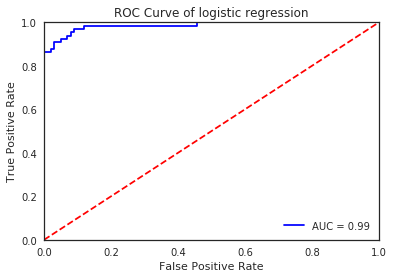

In [342]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_predict = logreg.predict(x_test)

y_prob = logreg.predict_proba(x_test)[:,1]
report = classification_report(y_test, y_predict)
print(report)

fpr, tpr, threshold = roc_curve(y_test, y_prob)
roc_auc =auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of logistic regression')
plt.show()


now we want to build model KNN , so we need to determine the k neigbours which give the less mean error .

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Text(0,0.5,'Mean Error')

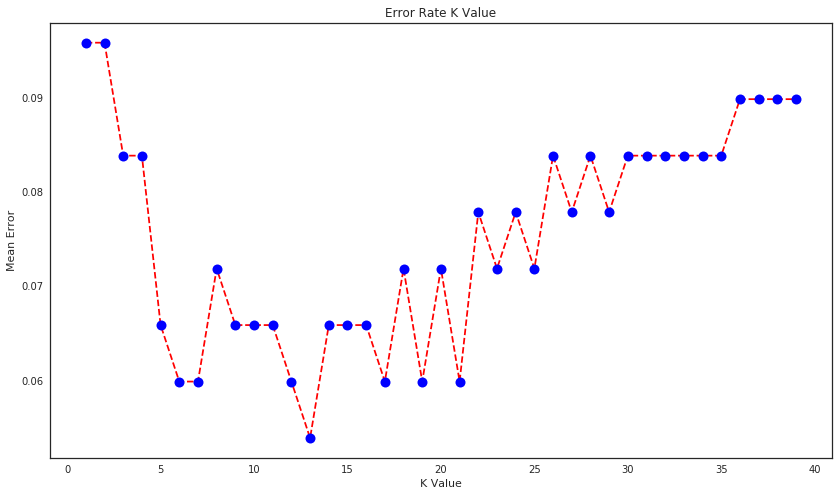

In [343]:
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    plt.figure(figsize=(14, 8))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

we found that the best k wich give less mean error is near 13 . so we will use k=13 .

Here we want to use the KNN as a modle to predict the probability of the classes for the 12 variable:

Test set score: 0.9461
             precision    recall  f1-score   support

          0       0.92      1.00      0.96       101
          1       1.00      0.86      0.93        66

avg / total       0.95      0.95      0.95       167

0.9318181818181819


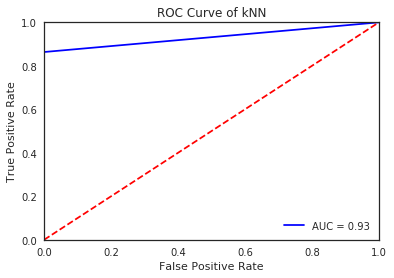

In [345]:

knn = KNeighborsClassifier(n_neighbors =13)
knn.fit(x_train, y_train)
y1_predict=knn.predict(x_test)

knn.score(x_test,y_test)
print("Test set score: {:.4f}".format(knn.score(x_test, y_test)))
report = classification_report(y_test, y1_predict)
print(report)

fpr, tpr, threshold = roc_curve(y_test, y1_predict)
roc_auc = auc(fpr, tpr)
print(roc_auc)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

here we want to use the Support vector machine algorithm for the  for the 12 variables:

             precision    recall  f1-score   support

          0       0.92      0.97      0.94       101
          1       0.95      0.86      0.90        66

avg / total       0.93      0.93      0.93       167

0.916966696669667


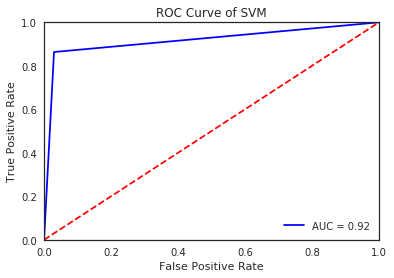

In [346]:
svm = SVC()
svm.fit(x_train, y_train)
y2_predict= svm.predict(x_test)

report = classification_report(y_test, y2_predict)
print(report)

fpr, tpr, threshold = roc_curve(y_test, y2_predict)
roc_auc = auc(fpr, tpr)
print(roc_auc)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of SVM')
plt.show()

**Conclusion:**
 
After downloading the dataset from kaggle we noticed that the data is very clear and to make sure of the process and go through the steps of the machine learning as we learn from this prokect we have added null values to the dataset and in the code here we have cleaned the null values that we added through deleting the null values of the row if the null is happening in the diagnosis since its affecting the output directly. and if the null value is in the colomn we have calculating the mean of the values and change the null values with the mean of the coloumn. 

After we finsh the data cleaning , we use the correlation of the variables in order to reduce the number of values by deletecting the values that correlated with each other and keep ione of them. as a result of this step , we have deleted 18 variables out of 32. 

Finally , we have used 3 algorithms in order to predict the Malicious and benign from the cases , and we find that the logistic regression have the best performance since logsitc regression can give us a probablibity plus the class so it give us more accurate result. 



```
# This is formatted as code
```

